<a href="https://colab.research.google.com/github/AhmadAlsebai/Patient-s-Condition-NLP-Project-Tutorial/blob/main/patient_condition_nlp_project_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project Tutorial

To analyze patient reviews on drugs and use Natural Language Processing (NLP) techniques to classify their medical condition. This classification will help in recommending suitable drugs based on their experiences and reported symptoms, ultimately improving personalized medication suggestions.

## Importing Library

In [2]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import itertools  # Importing itertools for working with iterators efficiently
import string  # Importing string module for string operations
import numpy as np  # Importing numpy for numerical computing
import seaborn as sns  # Importing seaborn for data visualization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Importing text vectorization tools from sklearn
from sklearn.model_selection import train_test_split  # Importing function to split data into training and testing sets
from sklearn.linear_model import PassiveAggressiveClassifier  # Importing PassiveAggressiveClassifier for text classification
from sklearn.naive_bayes import MultinomialNB  # Importing Naive Bayes classifier for text classification
from sklearn import metrics  # Importing metrics module for evaluating model performance
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization

# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)  # Setting pandas option to display all rows of a DataFrame


Read the Data

In [3]:
import csv
data_frame = pd.read_csv('drugsComTrain.tsv', sep='\t', quoting=csv.QUOTE_NONE, encoding='utf-8', on_bad_lines='skip')

In [4]:
data_frame.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""""""It has no side effect, I take it in combina...",9.0,"May 20, 2012",27.0
1,95260,Guanfacine,ADHD,"""""""My son is halfway through his fourth week o...",NaN,NaN,NaN
2,We have tried many different medications and s...,8.0,"April 27, 2010",192,NaN,NaN,NaN
3,92703,Lybrel,Birth Control,"""""""I used to take another oral contraceptive, ...",NaN,NaN,NaN
4,The positive side is that I didn&#039;t have a...,5.0,"December 14, 2009",17,NaN,NaN,NaN


In [5]:
data_frame.condition.value_counts().head(10)  # Counts and displays the number of occurrences of each unique condition in the dataset

,count
condition,
Birth Control,8549
Depression,2657
Pain,1770
Anxiety,1752
Acne,1662
Bipolar Disorde,1257
Insomnia,1135
Weight Loss,1099
Obesity,1061


In [6]:
data_frame_train = data_frame[(data_frame['condition'] == 'Birth Control') |  (data_frame['condition'] == 'Depression') |  (data_frame['condition'] == 'High Blood Pressure')
|  (data_frame['condition'] == 'Diabetes, Type 2')  ]  # Filtering the dataset to include only specific conditions

In [7]:
data_frame_train.shape

(12650, 7)

In [8]:
X = data_frame_train.drop(['Unnamed: 0', 'drugName', 'rating', 'date', 'usefulCount'], axis=1)

Goal: To remove unnecessary columns that are not needed for the analysis.
**.drop([...], axis=1) **→ Removes specified columns.

**'Unnamed: 0' **→ Likely an index column from CSV.

**'drugName' **→ The drug name, which might not be useful for text analysis.

**'rating' **→ A numerical score, not needed if focusing on text.

**'date'** → The date of the review, not required.

**'usefulCount'** → Number of upvotes on a review, may not be useful for classification.

In [9]:
X.condition.value_counts()

,count
condition,
Birth Control,8549
Depression,2657
"Diabetes, Type 2",770
High Blood Pressure,674


In [10]:
# Segregating dataframe for analyzing individual conditions

X_birth = X[X['condition'] == 'Birth Control']  # Filtering records where condition is 'Birth Control'
X_dep = X[X['condition'] == 'Depression']  # Filtering records where condition is 'Depression'
X_bp = X[X['condition'] == 'High Blood Pressure']  # Filtering records where condition is 'High Blood Pressure'
X_diab = X[X['condition'] == 'Diabetes, Type 2']  # Filtering records where condition is 'Diabetes, Type 2'


In [11]:
print(X_birth.head(10))

        condition                                             review
3   Birth Control  """I used to take another oral contraceptive, ...
5   Birth Control  """This is my first time using any form of bir...
11  Birth Control  """I had been on the pill for many years. When...
18  Birth Control  """Started Nexplanon 2 months ago because I ha...
27  Birth Control  """Nexplanon does its job. I can have worry fr...
73  Birth Control  """Never again! After being on depo I was supp...
75  Birth Control  """I was put on Yasmin for 6 months to regulat...
77  Birth Control  """I have been on this for 8 months and sad to...
78  Birth Control  """I was off birth control for a while conside...
82  Birth Control               """it caused me to gain 30 pounds"""


Text(0.5, 1.0, 'Word cloud for Diabetes')

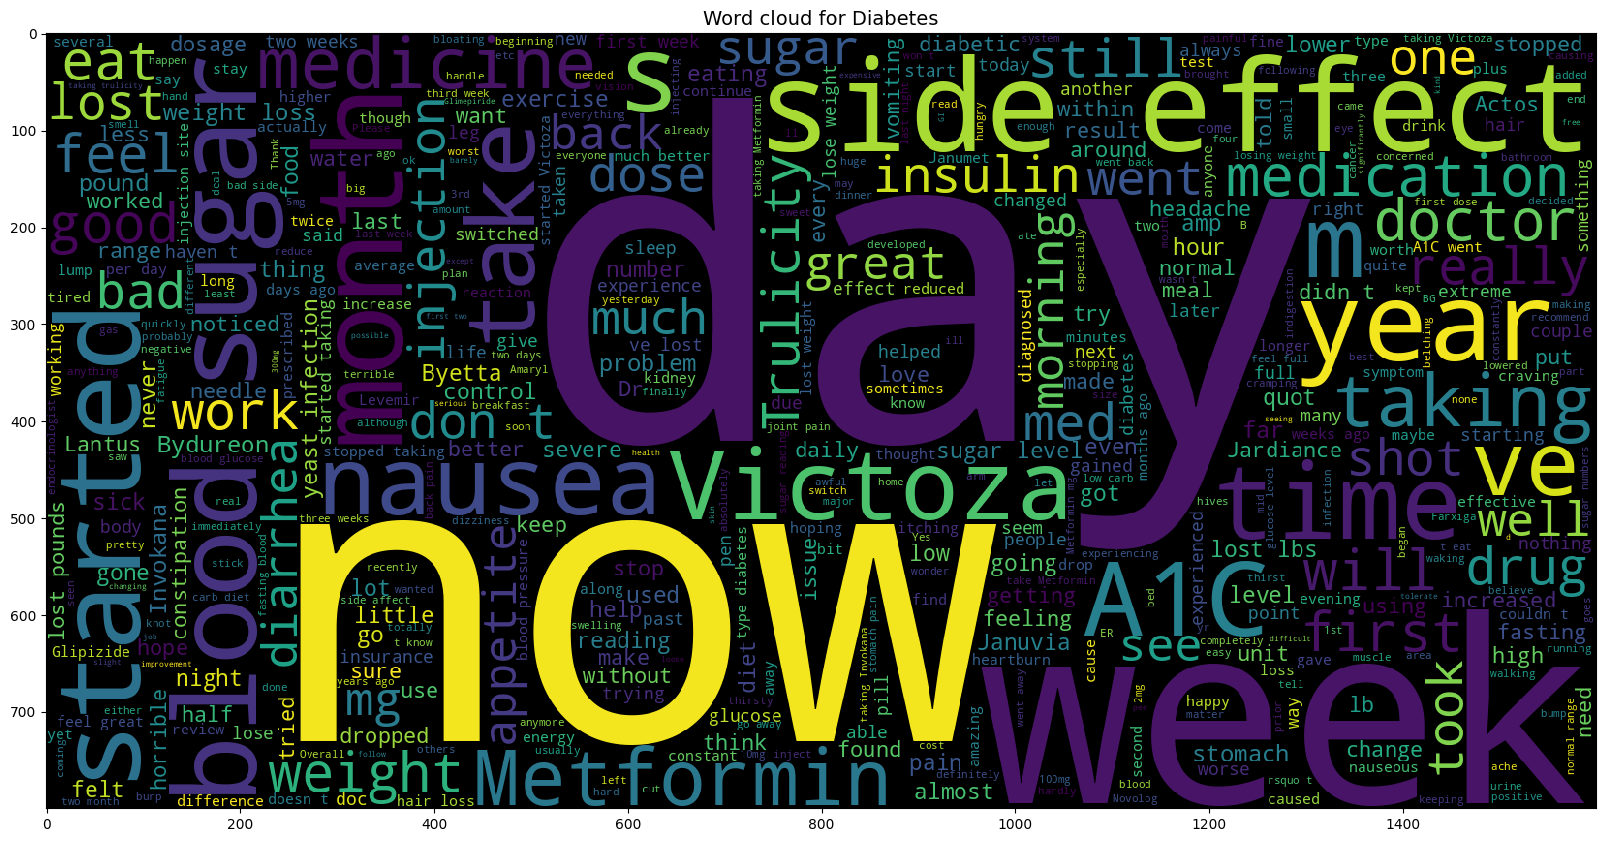

In [12]:
from wordcloud import WordCloud  # Importing WordCloud for generating word cloud visualizations

plt.figure(figsize=(20,20))  # Setting figure size for the next word cloud
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_diab.review))
# Creating a word cloud from the 'review' column of the 'X_diab' dataset (Diabetes reviews)
plt.imshow(wc, interpolation='nearest')  # Displaying the word cloud
plt.title('Word cloud for Diabetes', fontsize=14)  # Setting the title for the plot


Text(0.5, 1.0, 'Word cloud for Depression')

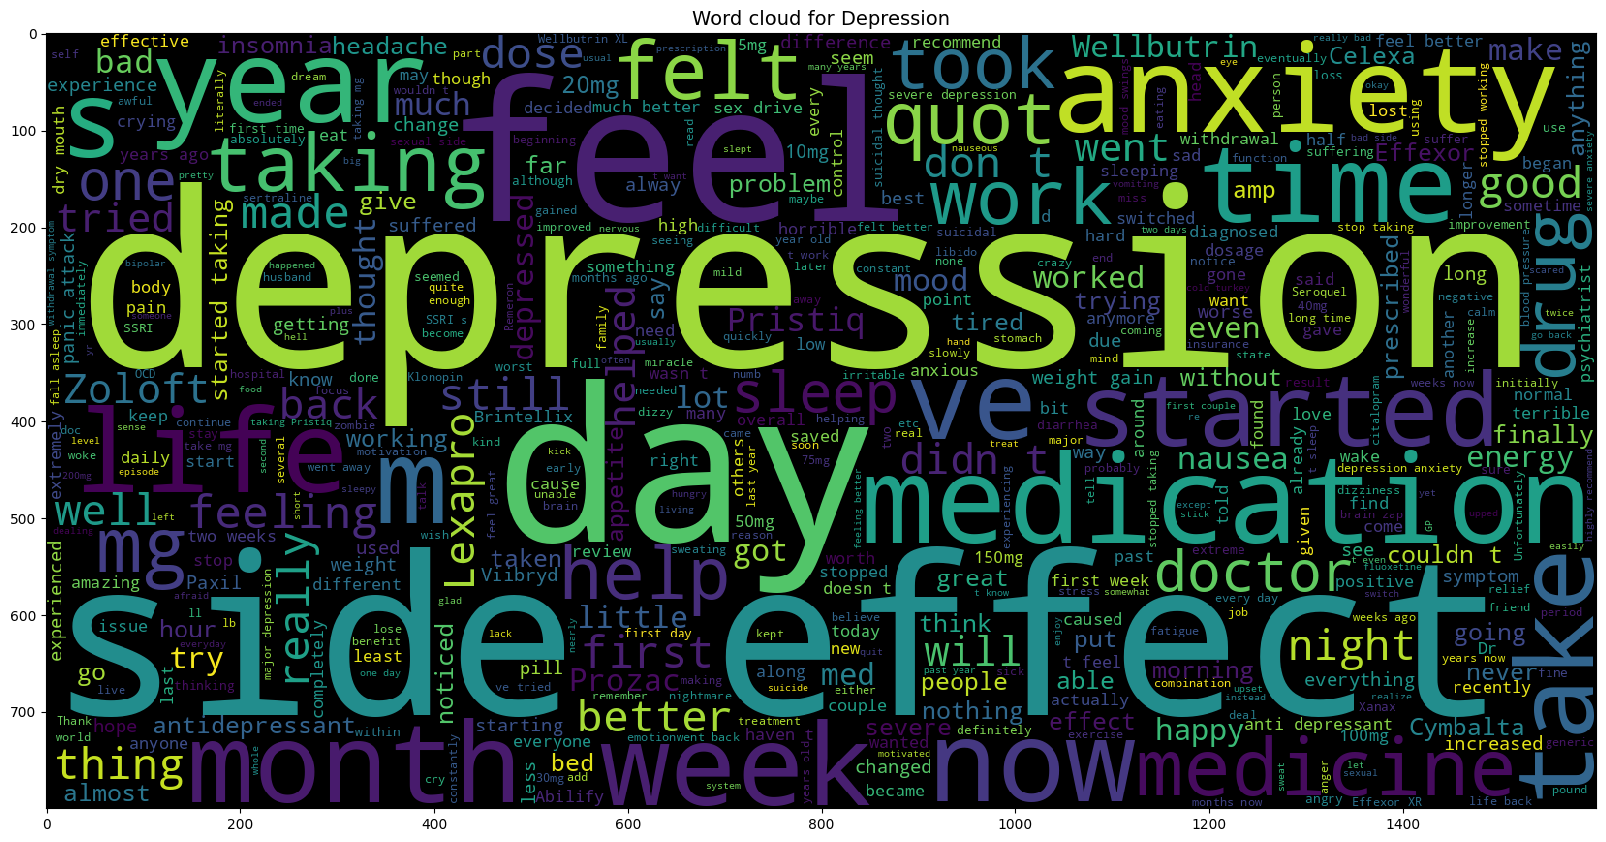

In [13]:
plt.figure(figsize=(20,20))  # Setting figure size for the next word cloud
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_dep.review))
# Creating a word cloud from the 'review' column of the 'X_diab' dataset (Depression reviews)
plt.imshow(wc, interpolation='nearest')  # Displaying the word cloud
plt.title('Word cloud for Depression', fontsize=14)  # Setting the title for the plot

In [14]:
X['review'].iloc[3]

'"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.'

In [15]:
X['review'].iloc[11]

'"""I have been on this for 8 months and sad to say it&#039;s caused nothing but my self esteem to become lower. I&#039;ve gained 10 lbs out of no where. I&#039;m only 22 and have a fast metabolism. I thought it started to slow down but it didn&#039;t make sense. My breasts got smaller, I have lost complete sex drive, my breasts aren&#039;t sensitive anymore at all like they used to be and I&#039;m so emotional, even crying at times. The only thing I can say is that it is 100% effective but not worth what it has done to my body. Not only that but I started breaking out on my body and on my face as well."""'

In [16]:
X.head()

,condition,review
3,Birth Control,"""""""I used to take another oral contraceptive, ..."
5,Birth Control,"""""""This is my first time using any form of bir..."
11,Birth Control,"""""""I had been on the pill for many years. When..."
13,Depression,"""""""I have taken anti-depressants for years, wi..."
18,Birth Control,"""""""Started Nexplanon 2 months ago because I ha..."


In [17]:
print(X.columns)  # Check available column names

Index(['condition', 'review'], dtype='object')


In [18]:
import nltk
nltk.download('stopwords')  #To filter out unimportant words and focus on the key terms in text analysis.
from nltk.corpus import stopwords # Provides a list of common words (stopwords) in various languages to filter out irrelevant terms.
allstopwords = stopwords.words('english') # Get the list of English stopwords
allstopwords.remove('not') # Remove 'not' from stopwords to retain its meaning in sentiment analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
from nltk.stem import WordNetLemmatizer  # Import lemmatizer for word normalization
from nltk.stem import PorterStemmer  # Import stemming algorithm
nltk.download('wordnet')  # Ensure WordNet is downloaded
porter = PorterStemmer()  # Initialize Porter Stemmer
lemmatizer = WordNetLemmatizer()  # Initialize WordNet Lemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
import re
# Function to clean the text
def clean_review(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower().split()  # Convert to lowercase and split into words
    text = [porter.stem(word) for word in text if not word in set(allstopwords)]  # Apply stemming and remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Apply lemmatization
    return ' '.join(text)  # Rejoin words into a cleaned sentence

In [21]:
print (len(X))

12650


In [22]:
X['review_cleaned'] = X['review'].apply(clean_review)  # Apply the cleaning function to the 'review' column

In [23]:
# Display the first few rows
X.head()

,condition,review,review_cleaned
3,Birth Control,"""""""I used to take another oral contraceptive, ...",use take anoth oral contracept pill cycl happi...
5,Birth Control,"""""""This is my first time using any form of bir...",first time use form birth control glad went pa...
11,Birth Control,"""""""I had been on the pill for many years. When...",pill mani year doctor chang rx chateal effect ...
13,Depression,"""""""I have taken anti-depressants for years, wi...",taken anti depress year improv mostli moder se...
18,Birth Control,"""""""Started Nexplanon 2 months ago because I ha...",start nexplanon month ago minim amount contrac...


## Creating feature and Target Variable

In [24]:
# Select the feature (independent variable) from the dataset
X_feat = X['review_cleaned']  # Feature: Cleaned review text

In [25]:
# Select the target (dependent variable) from the dataset
y = X['condition']  # Target variable: Condition (classification label)

In [26]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split  # Import function for splitting

X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y,  # Input features and target variable
    stratify=y,  # Ensures equal class distribution in train/test sets
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=0  # Set seed for reproducibility
)

Why is Stratification Important?

If the dataset is imbalanced (e.g., more positive reviews than negative ones), stratification ensures that both train and test sets have a similar class distribution.
This helps prevent biased model training.

In [43]:

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Function to plot a confusion matrix.

    Parameters:
    cm : array-like
        Confusion matrix values.
    classes : list
        List of class labels.
    normalize : bool, optional
        If True, normalizes the confusion matrix.
    title : str, optional
        Title of the plot.
    cmap : matplotlib colormap, optional
        Colormap used for visualization.
    """

    # Display the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)  # Set the plot title
    plt.colorbar()  # Add a color scale for reference

    # Define tick marks for class labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)  # X-axis labels (Predicted Labels)
    plt.yticks(tick_marks, classes)  # Y-axis labels (True Labels)

    # Normalize the confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Convert to percentages
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    # Set a threshold to determine text color (white or black)
    thresh = cm.max() / 2.

    # Loop through the confusion matrix and add the value in each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],  # Place text in each cell
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")  # Use contrasting text color

    # Adjust layout and labels for better visualization
    plt.tight_layout()
    plt.ylabel('True label')  # Y-axis label
    plt.xlabel('Predicted label')  # X-axis label


## Bag of words

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer and remove common English stopwords
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data into a bag-of-words representation
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using the same vocabulary from training
count_test = count_vectorizer.transform(X_test)


✅ CountVectorizer() converts text into a numerical matrix based on word counts.

✅ stop_words='english' removes common words like "the", "and", "is" to improve accuracy.

✅ fit_transform(X_train) learns vocabulary from training data and applies transformation.

✅ transform(X_test) applies the learned vocabulary to the test set (without refitting).

## Training the Naive Bayes model on the Training set

In [29]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naïve Bayes classifier
mnb = MultinomialNB()

# Train the model using the bag-of-words features and corresponding labels
mnb.fit(count_train, y_train)


MultinomialNB()

✅ MultinomialNB() is best for text classification since it works well with frequency-based features.

✅ fit(count_train, y_train) trains the model on the training dataset.

In [30]:
from sklearn import metrics

# Predict labels for test data
pred = mnb.predict(count_test)

# Calculate accuracy of the model
score = metrics.accuracy_score(y_test, pred)

# Print accuracy score
print("Accuracy:  %0.3f" % score)


Accuracy:  0.966


Confusion matrix, without normalization


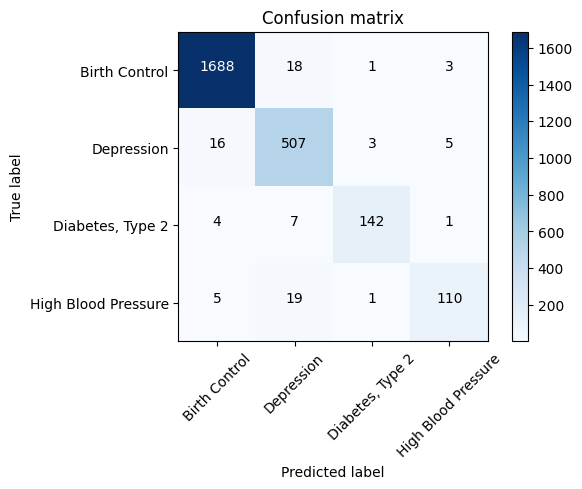

In [44]:
# Compute confusion matrix to evaluate classification performance
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


## Passive Aggressive Classifier

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression  # Import classifiers

# Initialize the Passive Aggressive Classifier
passive = PassiveAggressiveClassifier()

# Train the model on the training dataset
passive.fit(count_train, y_train)


PassiveAggressiveClassifier()

In [33]:
# Predict labels for the test dataset
pred = passive.predict(count_test)

# Calculate accuracy of the model
score = metrics.accuracy_score(y_test, pred)

# Print accuracy score
print("Accuracy:  %0.3f" % score)

Accuracy:  0.954


Confusion matrix, without normalization


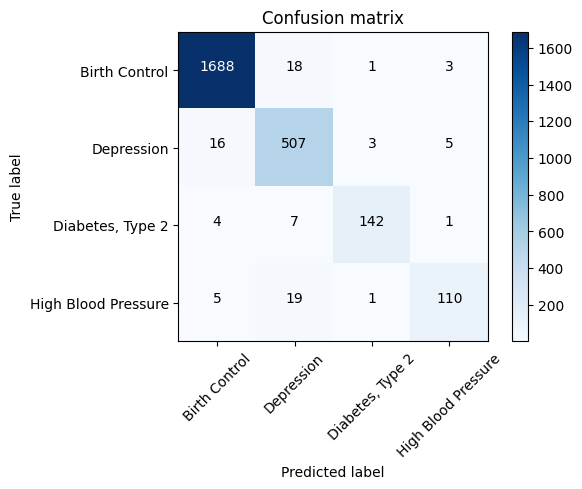

In [45]:
# Compute confusion matrix to evaluate classification performance
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

## TFIDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer

# Initialize TF-IDF Vectorizer with English stopwords and a max_df threshold
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Fit the vectorizer on the training data and transform it into a TF-IDF matrix
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the learned vocabulary and IDF weights
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

TF-IDF is a technique used to convert text into numerical features.

Unlike CountVectorizer, TF-IDF considers word importance by reducing the weight of frequently occurring words.

stop_words='english' → Removes common words like "the", "is", "and".

max_df=0.8 → Ignores words that appear in more than 80% of documents (removes very frequent words like "the" that are not useful).


Learns the vocabulary & IDF weights from the training data.
Converts X_train into a TF-IDF weighted feature matrix.

In [36]:
print(tfidf_train_2)

  (0, 3226)	0.2259515122886263
  (0, 4953)	0.12513726274543074
  (0, 599)	0.12820934091783615
  (0, 383)	0.248249075916935
  (0, 6093)	0.13190586605349564
  (0, 7257)	0.059420746501601694
  (0, 2666)	0.11842805209136198
  (0, 6633)	0.06624482962116615
  (0, 2430)	0.11402092204782419
  (0, 6268)	0.24150811196654987
  (0, 998)	0.10090641598815359
  (0, 4725)	0.07739608117047046
  (0, 4093)	0.24440857512899922
  (0, 6220)	0.18741615115885543
  (0, 3026)	0.1734342350076998
  (0, 2939)	0.09503602151232143
  (0, 2207)	0.08561129216001515
  (0, 5929)	0.14784905128590523
  (0, 1564)	0.05731522222961856
  (0, 2938)	0.1346778514953981
  (0, 3558)	0.1596767321521569
  (0, 5459)	0.161021907915696
  (0, 1397)	0.21111988064018686
  (0, 3997)	0.12323508553079944
  (0, 5831)	0.08274671444360099
  :	:
  (10119, 6426)	0.086877081845851
  (10119, 5577)	0.13561656192421626
  (10119, 3848)	0.11242241013129516
  (10119, 2796)	0.1686162972297
  (10119, 3726)	0.09351809633470226
  (10119, 2525)	0.138662062218

In [47]:
# Train the model using the bag-of-words features and corresponding labels
mnb.fit(tfidf_train_2, y_train)
# Predict labels for the test dataset
pred = passive.predict(tfidf_test_2)

# Calculate accuracy of the model
score = metrics.accuracy_score(y_test, pred)

# Print accuracy score
print("Accuracy:  %0.3f" % score)

Accuracy:  0.959


Confusion matrix, without normalization


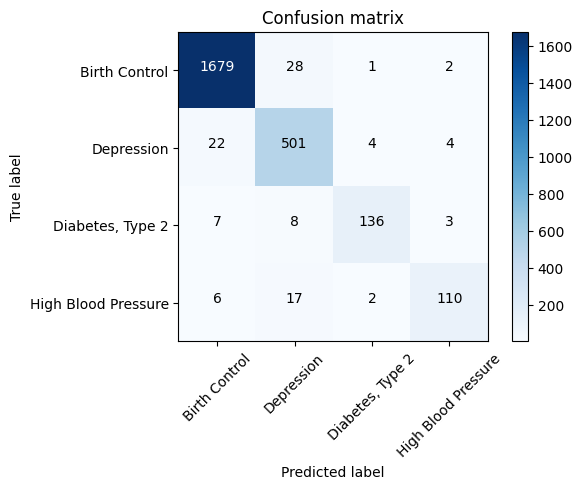

In [48]:
# Compute confusion matrix to evaluate classification performance
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

Accuracy:  0.969
Confusion matrix, without normalization


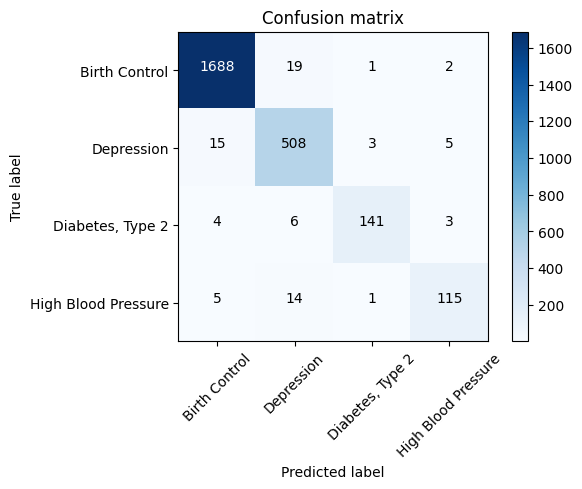

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer

# Step 1: Initialize TF-IDF Vectorizer with Bigrams
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
# - stop_words='english': Removes common English words (e.g., "the", "is", "and").
# - max_df=0.8: Ignores words that appear in more than 80% of documents (removes too frequent words).
# - ngram_range=(1,2): Extracts both unigrams (single words) and bigrams (two-word sequences).

# Step 2: Fit TF-IDF on Training Data and Transform Text
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)

# Step 3: Transform the Test Data Using the Learned Vocabulary
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

# Step 4: Train a Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

pass_tf = PassiveAggressiveClassifier()  # Initialize classifier
pass_tf.fit(tfidf_train_2, y_train)  # Train the model

# Step 5: Predict Labels for the Test Set
pred = pass_tf.predict(tfidf_test_2)

# Step 6: Evaluate Model Performance (Accuracy Score)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:  %0.3f" % score)  # Print accuracy with 3 decimal places

# Step 7: Compute Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Step 8: Plot the Confusion Matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


Accuracy:  0.966
Confusion matrix, without normalization


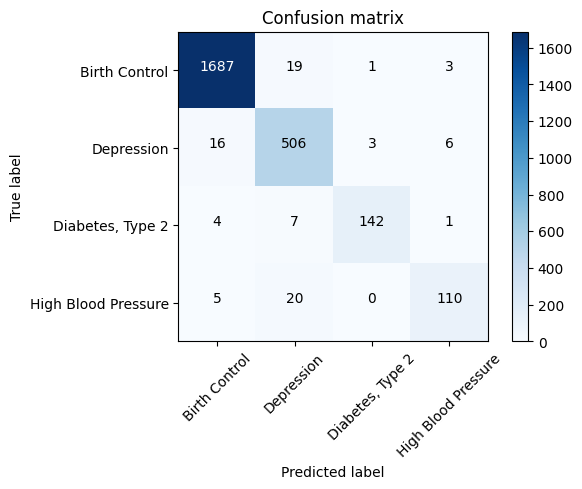

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TF-IDF vectorizer

# Step 1: Initialize TF-IDF Vectorizer with Bigrams
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
# - stop_words='english': Removes common English words (e.g., "the", "is", "and").
# - max_df=0.8: Ignores words that appear in more than 80% of documents (removes too frequent words).
# - ngram_range=(1,2): Extracts both unigrams (single words) and bigrams (two-word sequences).

# Step 2: Fit TF-IDF on Training Data and Transform Text
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)

# Step 3: Transform the Test Data Using the Learned Vocabulary
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

# Step 4: Train a Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

pass_tf = PassiveAggressiveClassifier()  # Initialize classifier
pass_tf.fit(tfidf_train_2, y_train)  # Train the model

# Step 5: Predict Labels for the Test Set
pred = pass_tf.predict(tfidf_test_2)

# Step 6: Evaluate Model Performance (Accuracy Score)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:  %0.3f" % score)  # Print accuracy with 3 decimal places

# Step 7: Compute Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Step 8: Plot the Confusion Matrix
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])


## Information

In [54]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    """
    Finds and prints the most informative features (words) for a given class in a trained classifier.

    Parameters:
    - vectorizer: TF-IDF vectorizer used for text transformation
    - classifier: Trained linear classifier (e.g., logistic regression)
    - classlabel: The target class for which to extract important features
    - n: Number of top features to display (default is 10)
    """

    # Get the index of the specified class label
    labelid = list(classifier.classes_).index(classlabel)

    # Retrieve feature (word) names from the vectorizer (use get_feature_names_out instead of get_feature_names)
    feature_names = vectorizer.get_feature_names_out()

    # Get the feature importance (coefficient) for the specified class
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]  # Sort and get top n features

    # Print the most informative features for the class
    for coef, feat in topn:
        print(classlabel, feat, coef)


In [55]:
# Calling the function for different medical conditions to extract important features
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')


Birth Control curl 0.6478708899721093
Birth Control ablat 0.657969663893303
Birth Control acclim 0.7041226465923882
Birth Control woman 0.7154785345256638
Birth Control aromatherapi 0.7690017838343494
Birth Control elsewher 0.7886318767997014
Birth Control lunchbox 0.8066883282128814
Birth Control lousi 0.8514024198790706
Birth Control junuvia 0.9050732789955717
Birth Control brother 4.357355871873014


In [56]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')


Depression atacand 0.7486996143581356
Depression haver 0.7615818488664776
Depression dizzy 0.8638318752640806
Depression nonexsist 1.0074161115184257
Depression season 1.0244191492807007
Depression seattl 1.2020633212666914
Depression trinessa 1.3483464881798783
Depression situp 1.563175044226347
Depression adequ 2.68365971452247
Depression seratonin 3.065296041327463


In [57]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')


High Blood Pressure bride 0.678213339843983
High Blood Pressure wari 0.6990600870200814
High Blood Pressure hole 0.7711102405567347
High Blood Pressure permiss 0.7775942425221649
High Blood Pressure despair 0.9161134122787716
High Blood Pressure punctur 0.9427115917678331
High Blood Pressure firework 1.054966141594824
High Blood Pressure nexpalnon 1.470673788461316
High Blood Pressure reconstruct 1.5852891792644672
High Blood Pressure outing 2.3515606594738547


In [58]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 gage 0.4989578100268445
Diabetes, Type 2 satisfactori 0.501345856182051
Diabetes, Type 2 furo 0.501797619425134
Diabetes, Type 2 hinder 0.5053601922575379
Diabetes, Type 2 coupon 0.5356012015117474
Diabetes, Type 2 blister 0.5436574959909474
Diabetes, Type 2 hum 0.6960586144827138
Diabetes, Type 2 noncycl 0.8581226449920372
Diabetes, Type 2 node 1.5233479530383893
Diabetes, Type 2 cruncher 2.476851265092094


## Sample Prediction